In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!py -m pip install folium

/bin/bash: py: command not found


In [4]:

import folium
from folium.plugins import MarkerCluster

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/daattali/statsTerrorismProject/master/globalterrorismdb.csv",encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,55,56,57,107,108,114) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,corp1,target1,natlty1,natlty1_txt,...,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,.,0,1,0,1,Assassination,NaN,.,NaN,.,14,Private Citizens & Property,NaN,Julio Guzman,58.0,Dominican Republic,...,.,NaN,.,NaN,.,NaN,.,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,.,0,1,0,6,Hostage Taking (Kidnapping),NaN,.,NaN,.,7,Government (Diplomatic),Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,...,.,NaN,.,NaN,.,NaN,.,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,.,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,NaN,Tarlac,NaN,NaN,NaN,0,NaN,NaN,1,1,1,-9.0,NaN,.,0,1,0,1,Assassination,NaN,.,NaN,.,10,Journalists & Media,Voice of America,Employee,217.0,United States,...,.,NaN,.,NaN,.,NaN,.,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,NaN,Athens,37.979180,23.716647,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,.,0,1,0,3,Bombing/Explosion,NaN,.,NaN,.,7,Government (Diplomatic),NaN,U.S. Embassy,217.0,United States,...,.,NaN,.,NaN,.,NaN,.,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,NaN,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,.,0,1,0,7,Facility/Infrastructure Attack,NaN,.,NaN,.,7,Government (Diplomatic),NaN,U.S. Consulate,217.0,United States,...,.,NaN,.,NaN,.,NaN,.,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104689 entries, 0 to 104688
Columns: 123 entries, eventid to dbsource
dtypes: float64(52), int64(17), object(54)
memory usage: 98.2+ MB


In [8]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,natlty1,targtype2,natlty2,targtype3,natlty3,guncertain1,guncertain2,guncertain3,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased
eventid,1.000000,0.999994,0.019750,0.000350,0.091707,-0.103850,0.325258,0.120138,0.339510,0.017948,0.051488,-0.161161,-0.409453,0.151925,0.799465,-0.010732,0.061410,0.015327,0.114985,0.005084,-0.089083,-0.084697,0.089245,-0.077278,0.010875,-0.094496,0.068553,-0.029208,0.326189,0.282912,0.435728,-0.104384,0.534007,0.028182,0.279747,-0.033268,0.301097,-0.150084,-0.124204,0.152980,-0.035692,0.097036,-0.248888,0.087743,-0.330464,0.213645,0.035249,0.369024,0.017958,-0.039627,-0.030393,0.026246,-0.031033,-0.006777,-0.324777,-0.040744,0.012302,0.003970,-0.025693,-0.073070,-0.402963,-0.347648,-0.337729,-0.017756,0.074074,-0.128903,-0.164149,0.444512,-0.209453
iyear,0.999994,1.000000,0.016665,0.000274,0.091704,-0.103779,0.325303,0.120198,0.339449,0.017988,0.051644,-0.161074,-0.409497,0.151914,0.799504,-0.010279,0.061376,0.015312,0.114974,0.005085,-0.089049,-0.084321,0.089267,-0.077220,0.010665,-0.094373,0.068325,-0.029432,0.326196,0.283046,0.435676,-0.104461,0.533838,0.027987,0.279864,-0.032118,0.306235,-0.149136,-0.113829,0.151940,-0.035686,0.097018,-0.248886,0.087726,-0.330364,0.214134,0.035372,0.368842,0.017944,-0.039656,-0.030383,0.026243,-0.031052,-0.006770,-0.324771,-0.040728,0.012322,0.003954,-0.025726,-0.073114,-0.402987,-0.347825,-0.337404,-0.017717,0.074619,-0.128979,-0.163960,0.444572,-0.209472
imonth,0.019750,0.016665,1.000000,0.002966,-0.001666,-0.024419,-0.007539,-0.011316,0.019126,-0.012304,-0.024623,-0.041932,0.005340,0.010114,0.004391,-0.069685,0.013081,0.004983,0.006288,-0.001356,0.005561,-0.056946,-0.005512,-0.018779,0.054406,-0.029363,0.060180,0.055889,0.003471,-0.030673,-0.203663,0.021639,0.063658,0.044399,0.023579,-0.075432,0.014426,0.092683,0.017085,0.115780,-0.003253,0.006813,-0.003050,0.008691,-0.018204,-0.090193,-0.023329,0.094958,0.004661,0.004358,-0.004031,0.001419,0.002330,-0.002001,-0.011852,-0.011154,-0.005143,0.003066,0.011557,0.011961,0.003938,-0.003460,-0.082894,-0.014869,-0.068489,0.008579,-0.055565,0.023450,-0.004450
iday,0.000350,0.000274,0.002966,1.000000,-0.005426,0.004437,-0.000118,0.019263,0.020282,-0.025917,-0.003194,0.012799,-0.015217,0.001288,-0.011732,0.026656,-0.015420,-0.002645,0.006194,-0.014763,-0.015006,-0.046039,-0.003682,0.010394,-0.014463,-0.037363,-0.057258,-0.062116,0.000677,-0.016066,-0.159023,-0.023369,0.005937,-0.000523,0.001201,-0.058049,0.019833,0.093249,0.283797,0.018342,-0.008953,0.009665,0.003530,-0.035238,-0.001496,-0.063471,-0.034450,0.055399,-0.002437,0.004491,-0.001930,0.003572,0.004560,0.002866,0.000499,-0.001907,-0.001508,-0.004326,-0.021791,-0.003928,-0.020920,0.006665,-0.000368,0.010431,-0.303061,0.013601,0.005174,0.006905,0.031811
extended,0.091707,0.091704,-0.001666,-0.005426,1.000000,-0.039340,0.017035,-0.018734,0.017354,-0.000217,-0.005190,-0.020517,-0.016161,0.051243,0.101193,0.068983,-0.020820,0.047353,-0.019250,0.231713,0.100004,-0.024198,0.007502,0.004306,0.017796,0.021738,0.117078,0.006975,0.073952,-0.152335,-0.024507,-0.007077,0.027915,-0.002995,0.090448,-0.261852,0.105200,-0.307478,-0.049029,0.052068,0.207574,-0.088769,0.051465,0.094623,-0.040655,0.065124,-0.037861,0.079384,-0.002979,-0.001607,0.000088,-0.008711,-0.002430,-0.004371,-0.081957,0.063814,-0.000451,0.478750,-0.014201,-0.006673,0.056203,0.116628,-0.214077,-0.013999,0.153870,-0.013223,0.075590,0.054454,-0.088897
...,...,...,...,...,...,...,...,...,...,...

In [9]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt',
       'nreleased', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource'],
      dtype='object', length=123)

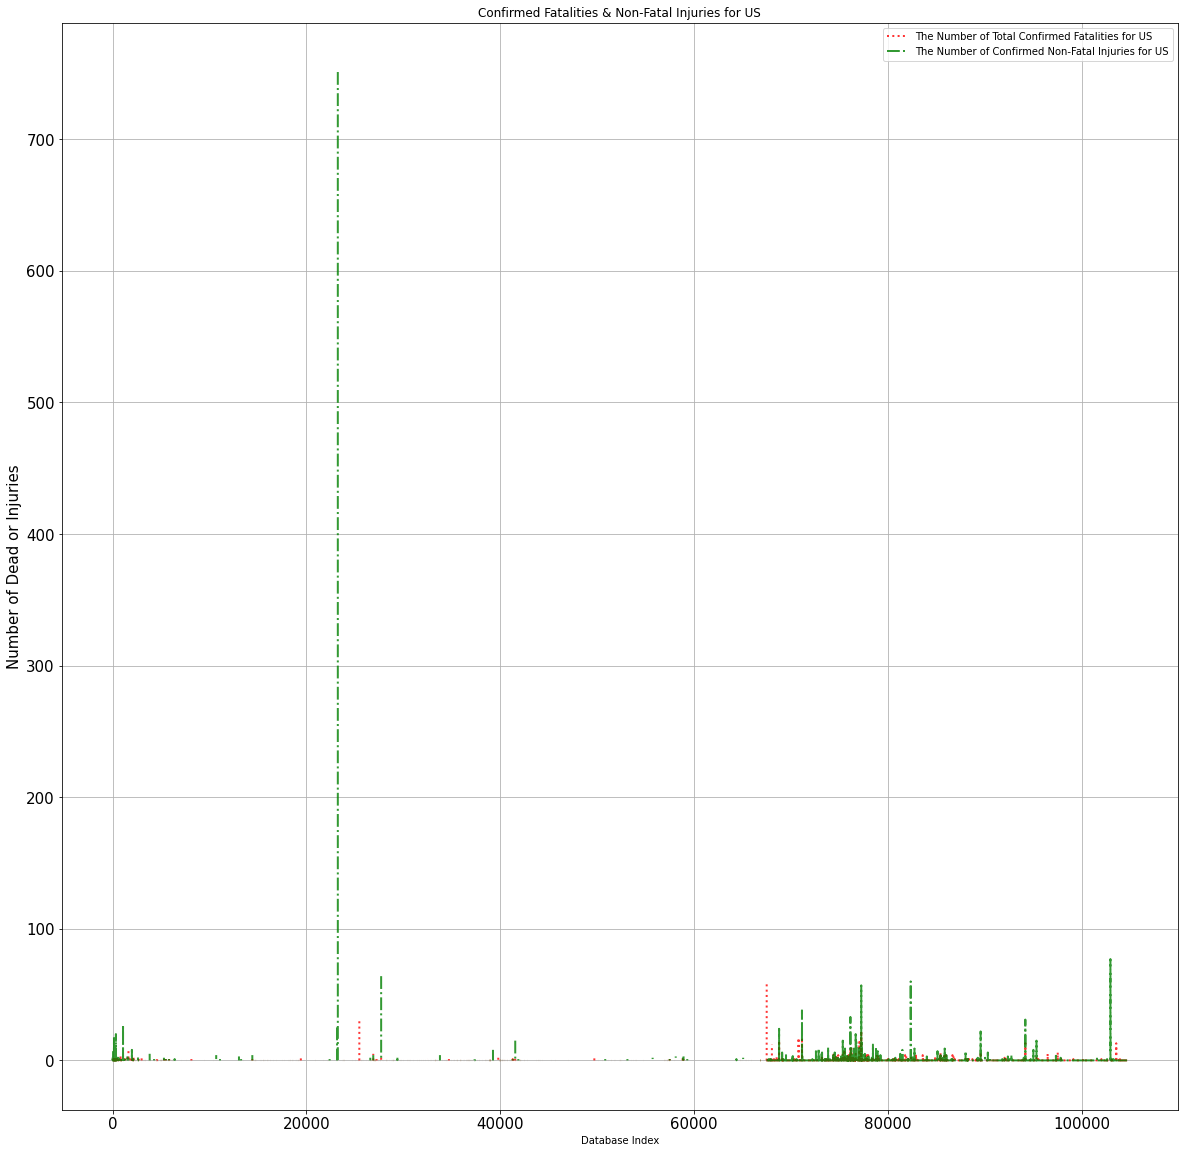

In [10]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
df.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

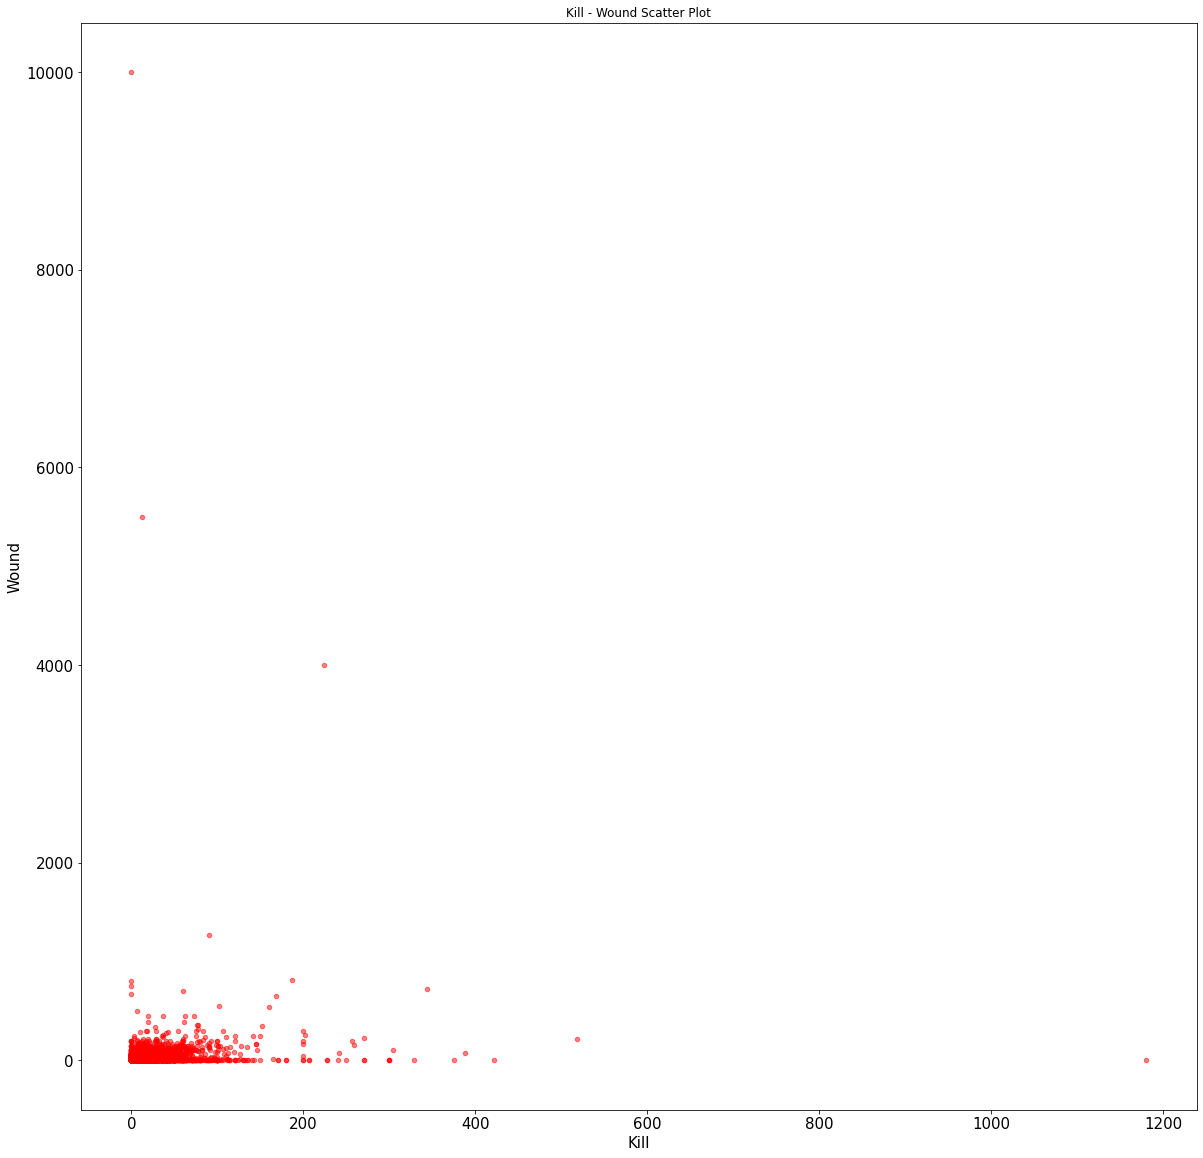

In [11]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

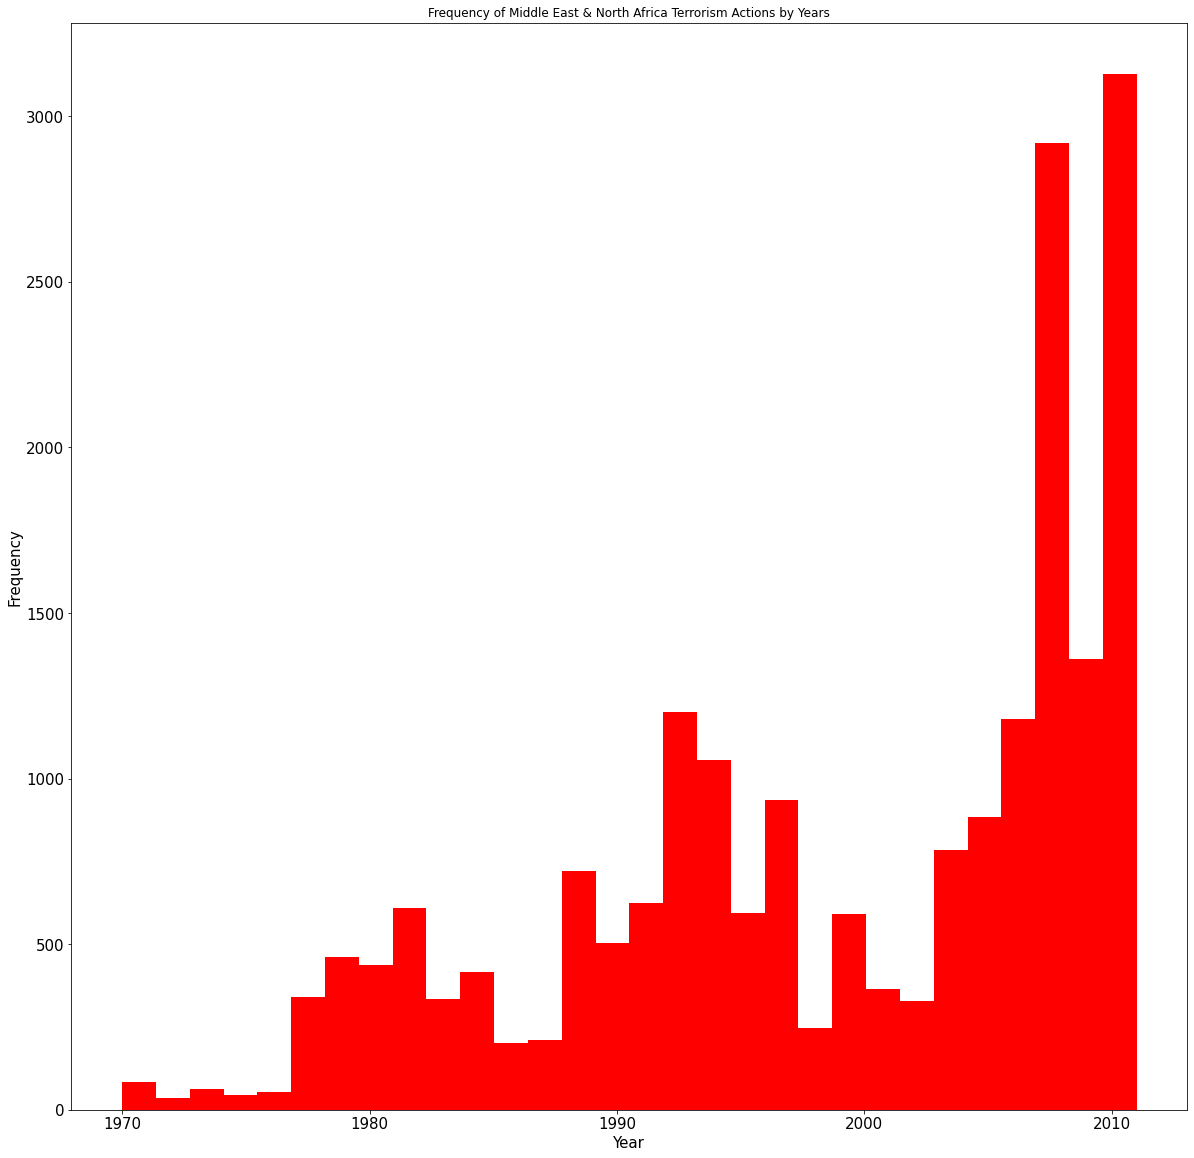

In [12]:
middleEastData = df[df['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

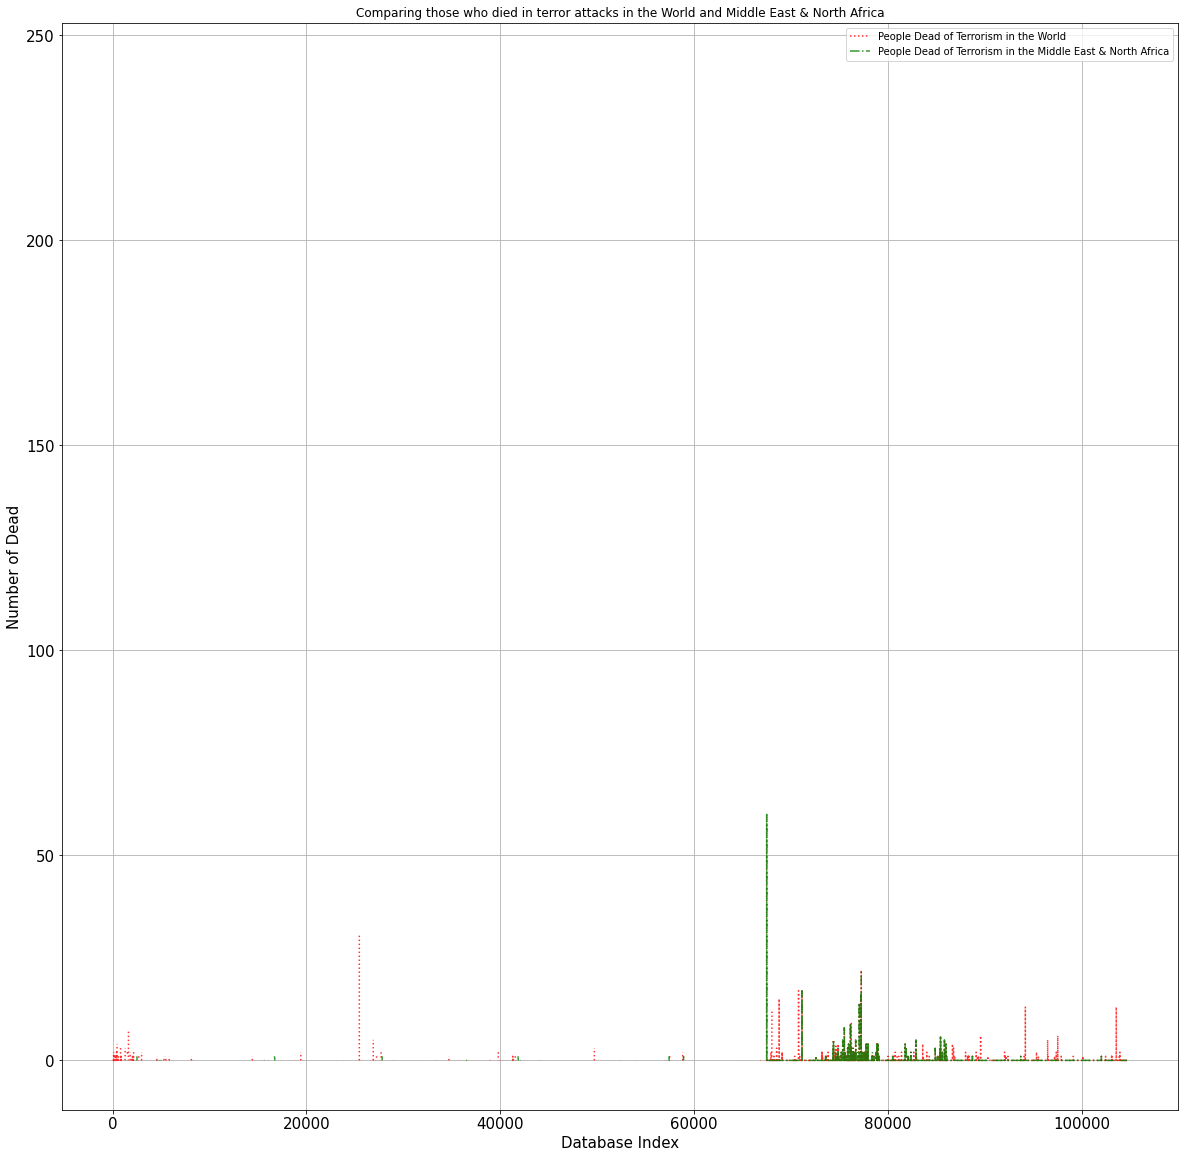

In [13]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()

In [14]:
filterYear = df['iyear'] == 1970

In [15]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [16]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [17]:
killData = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 228525


In [18]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [19]:

typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,112636.0,19477.0,74350.666667,3303.333333,3600.0,1232.0,3981.0,640.0,9306.0


In [20]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


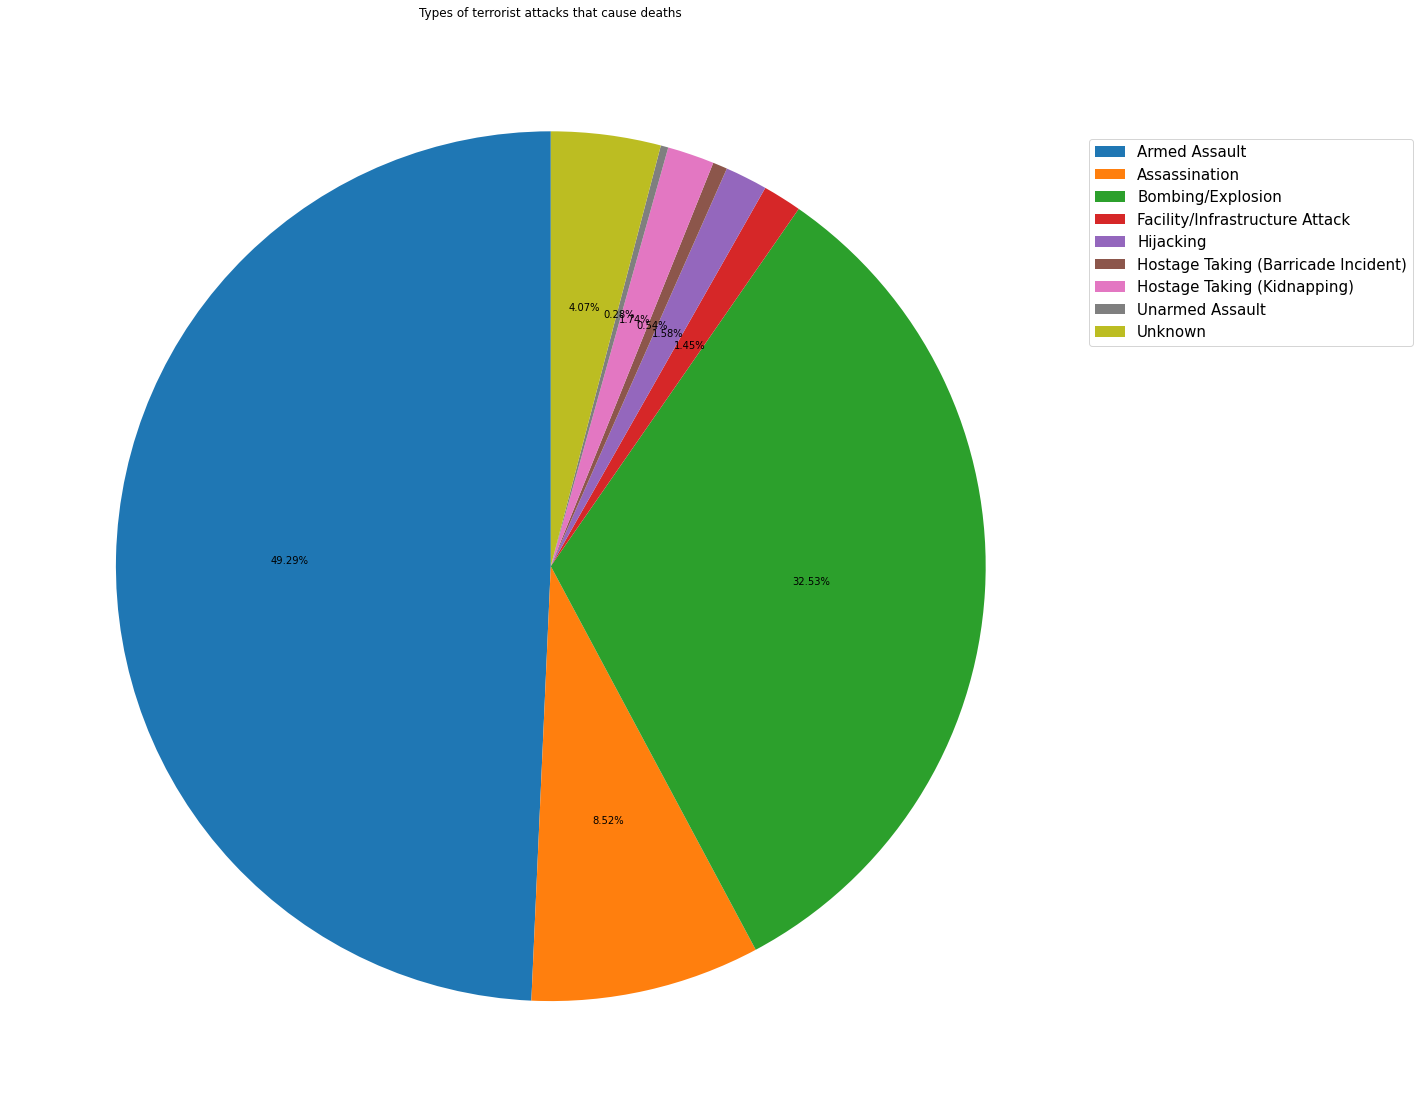

In [21]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

In [22]:
countryData = df.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [23]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Virgin Islands (U.S.),Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zambia,Zimbabwe
nkill,8150.0,41.0,10883.0,0.0,2935.0,1.0,489.0,31.0,31.0,28.0,252.0,1.0,16.0,984.0,76.0,14.0,36.0,3.0,0.0,1.0,9.0,42.0,75.0,11.0,213.0,0.0,20.0,2.0,4248.0,543.0,123.0,338.0,0.0,144.0,562.0,223.0,467.0,13976.0,1.0,171.0,...,95.0,1266.0,15495.0,0.0,2.0,2561.0,29.0,2.0,13.0,74.0,713.0,60.0,288.0,40.0,1777.0,32.0,76.0,6.0,115.0,4787.0,0.0,2898.0,10.0,122.0,3467.0,5.0,59.0,0.0,0.0,211.0,1.0,1.0,0.0,1186.0,95.0,1.0,1104.0,120.0,70.0,153.0


In [24]:

countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 209 entries, Afghanistan to Zimbabwe
dtypes: float64(209)
memory usage: 1.6+ KB


In [25]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

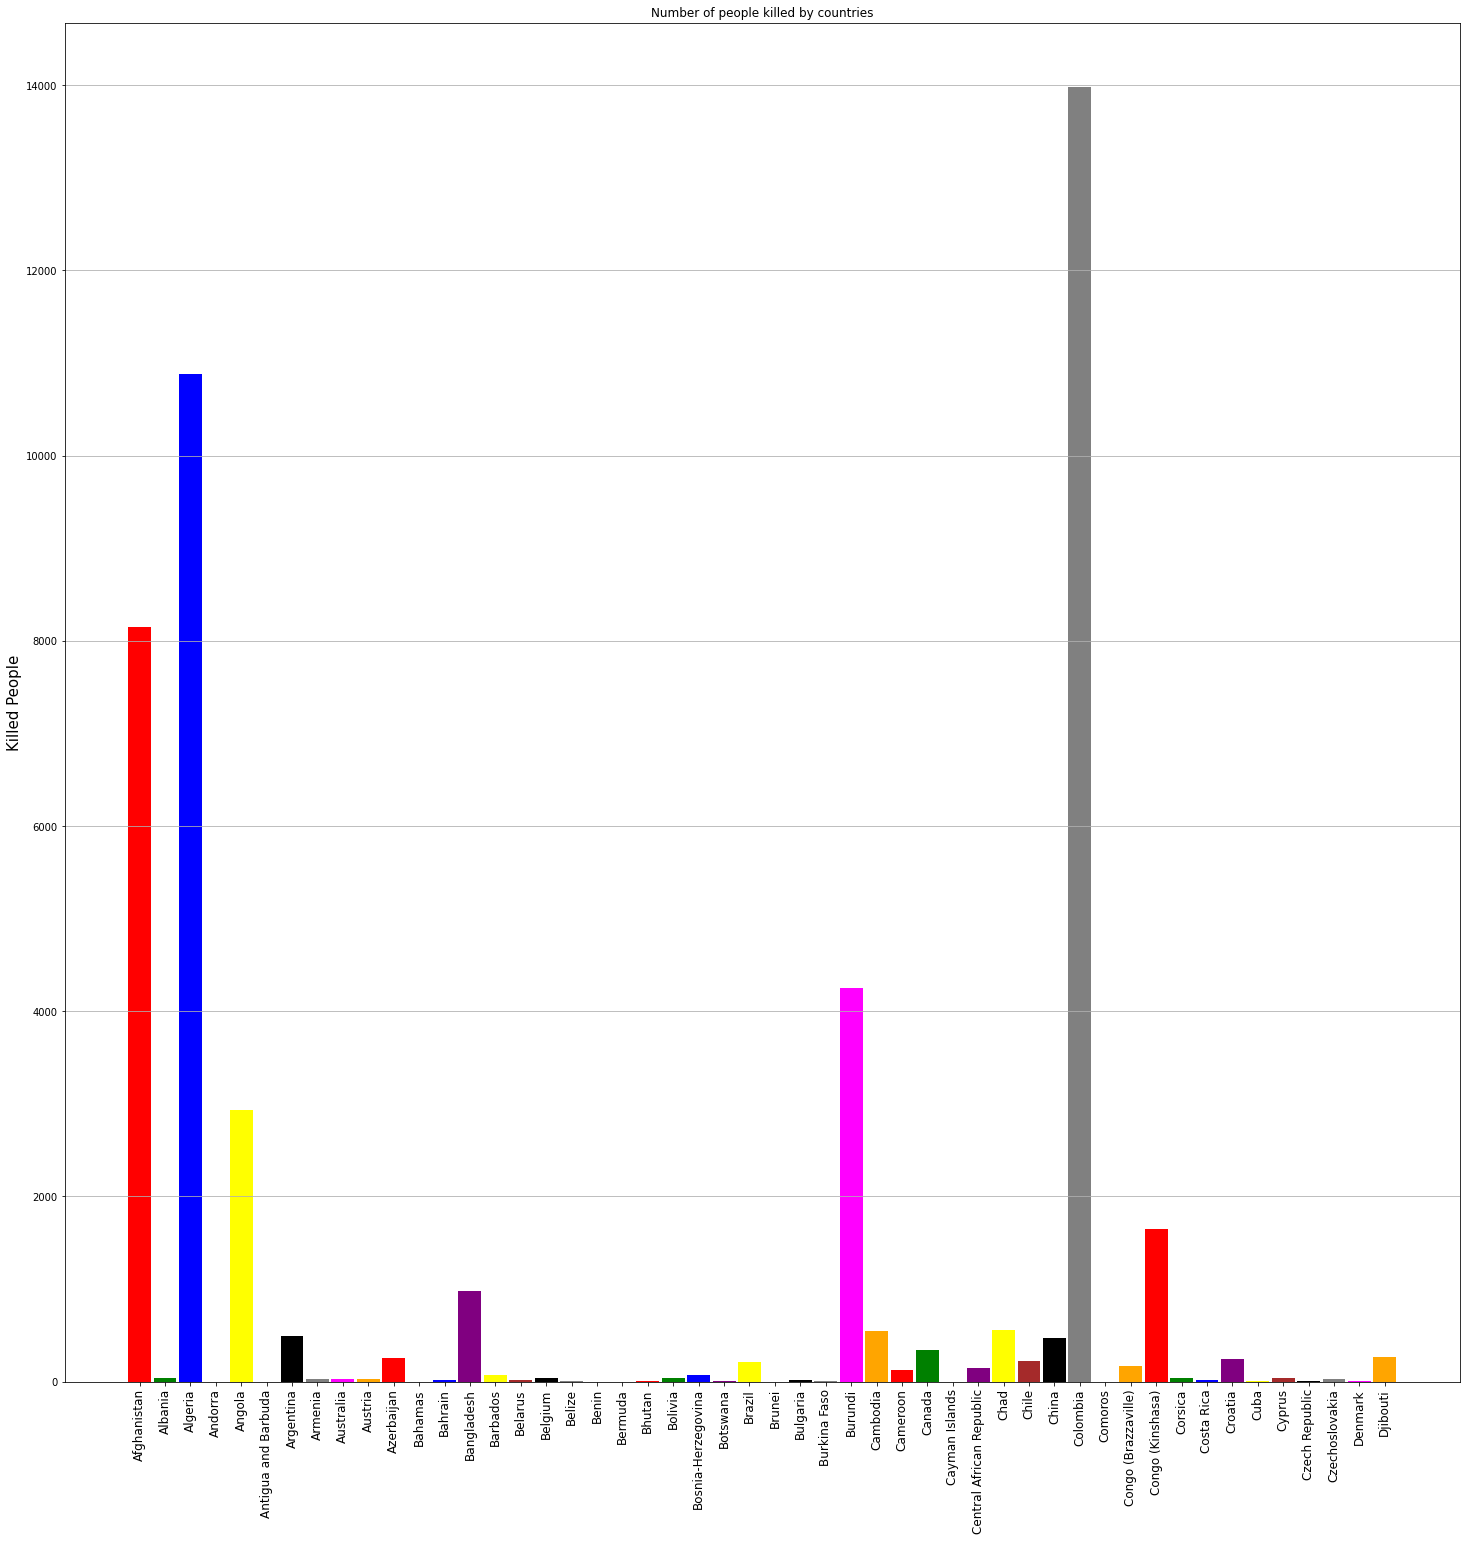

In [26]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

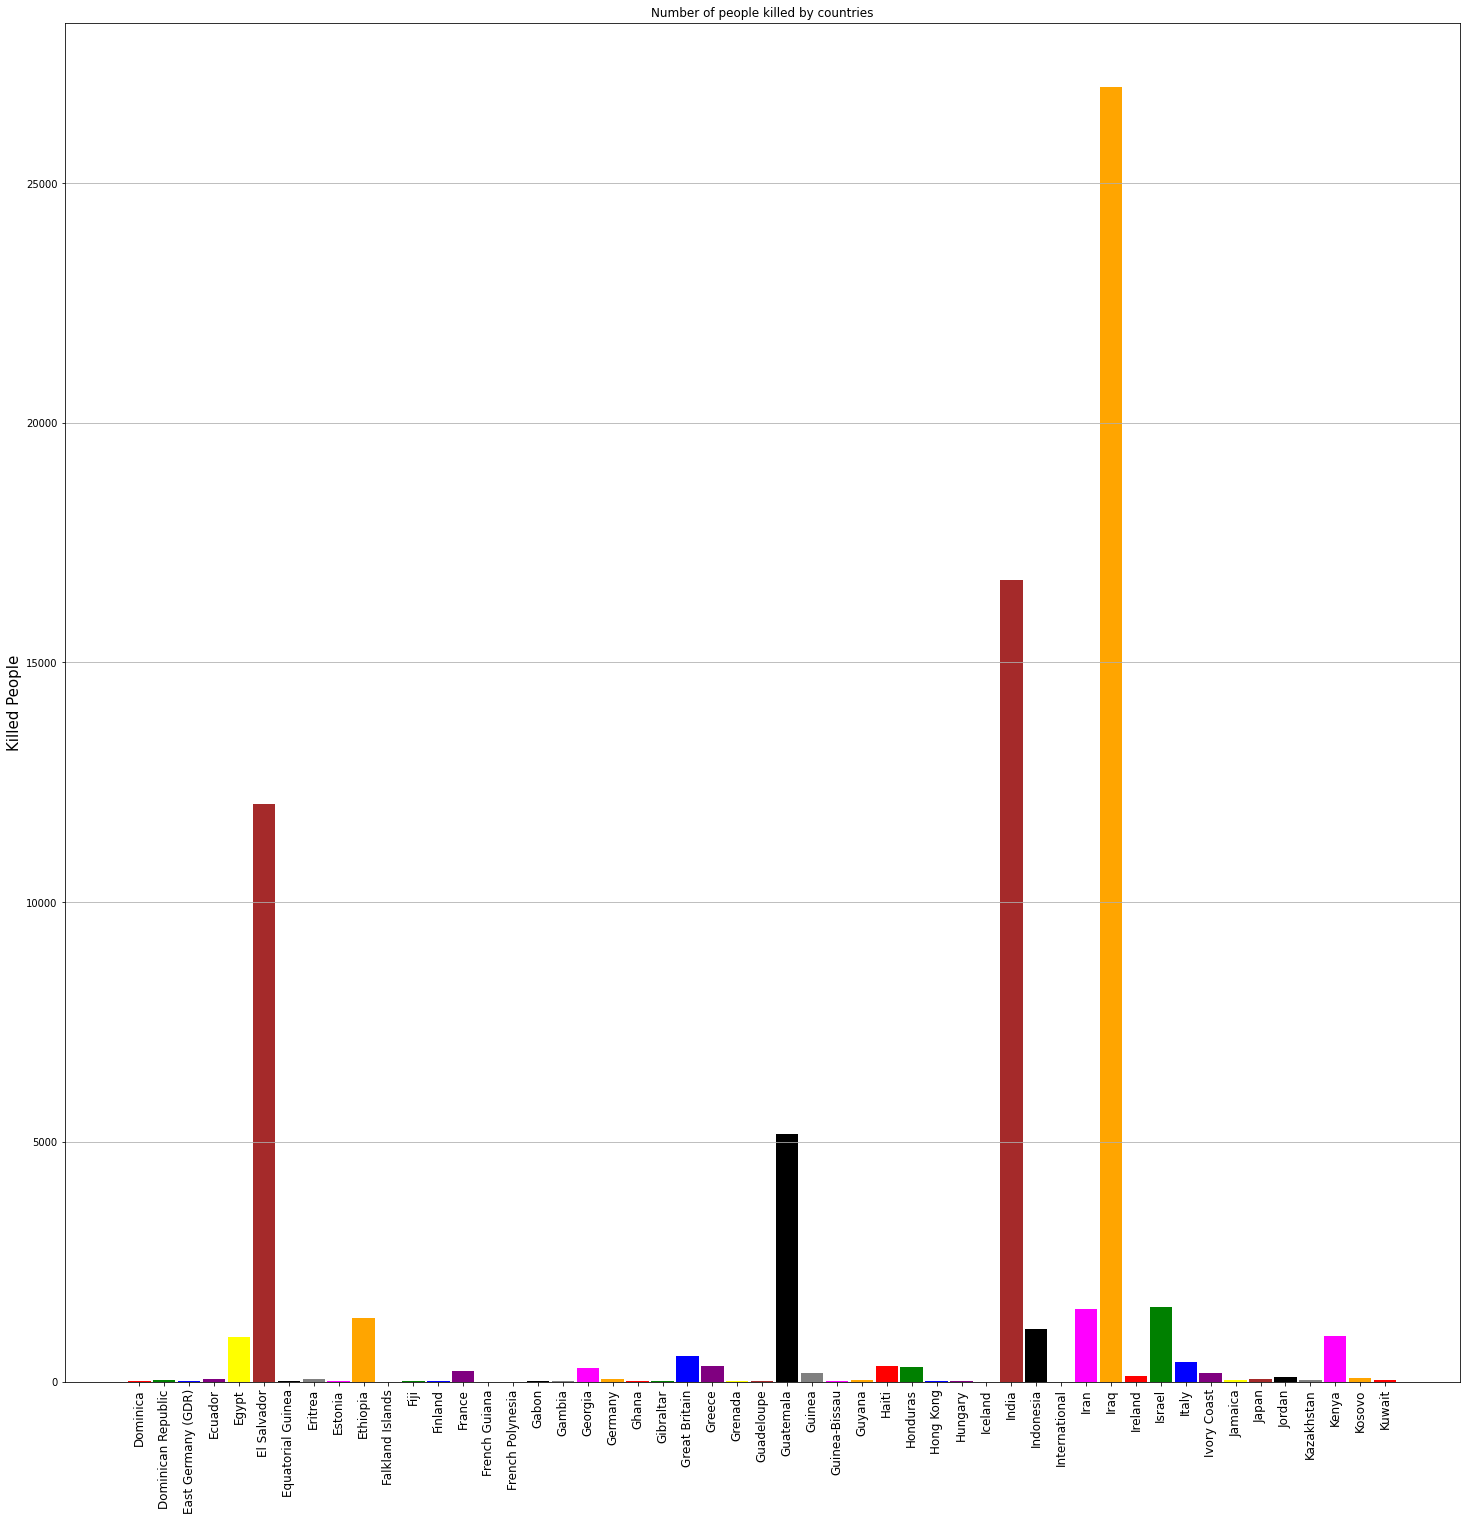

In [27]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

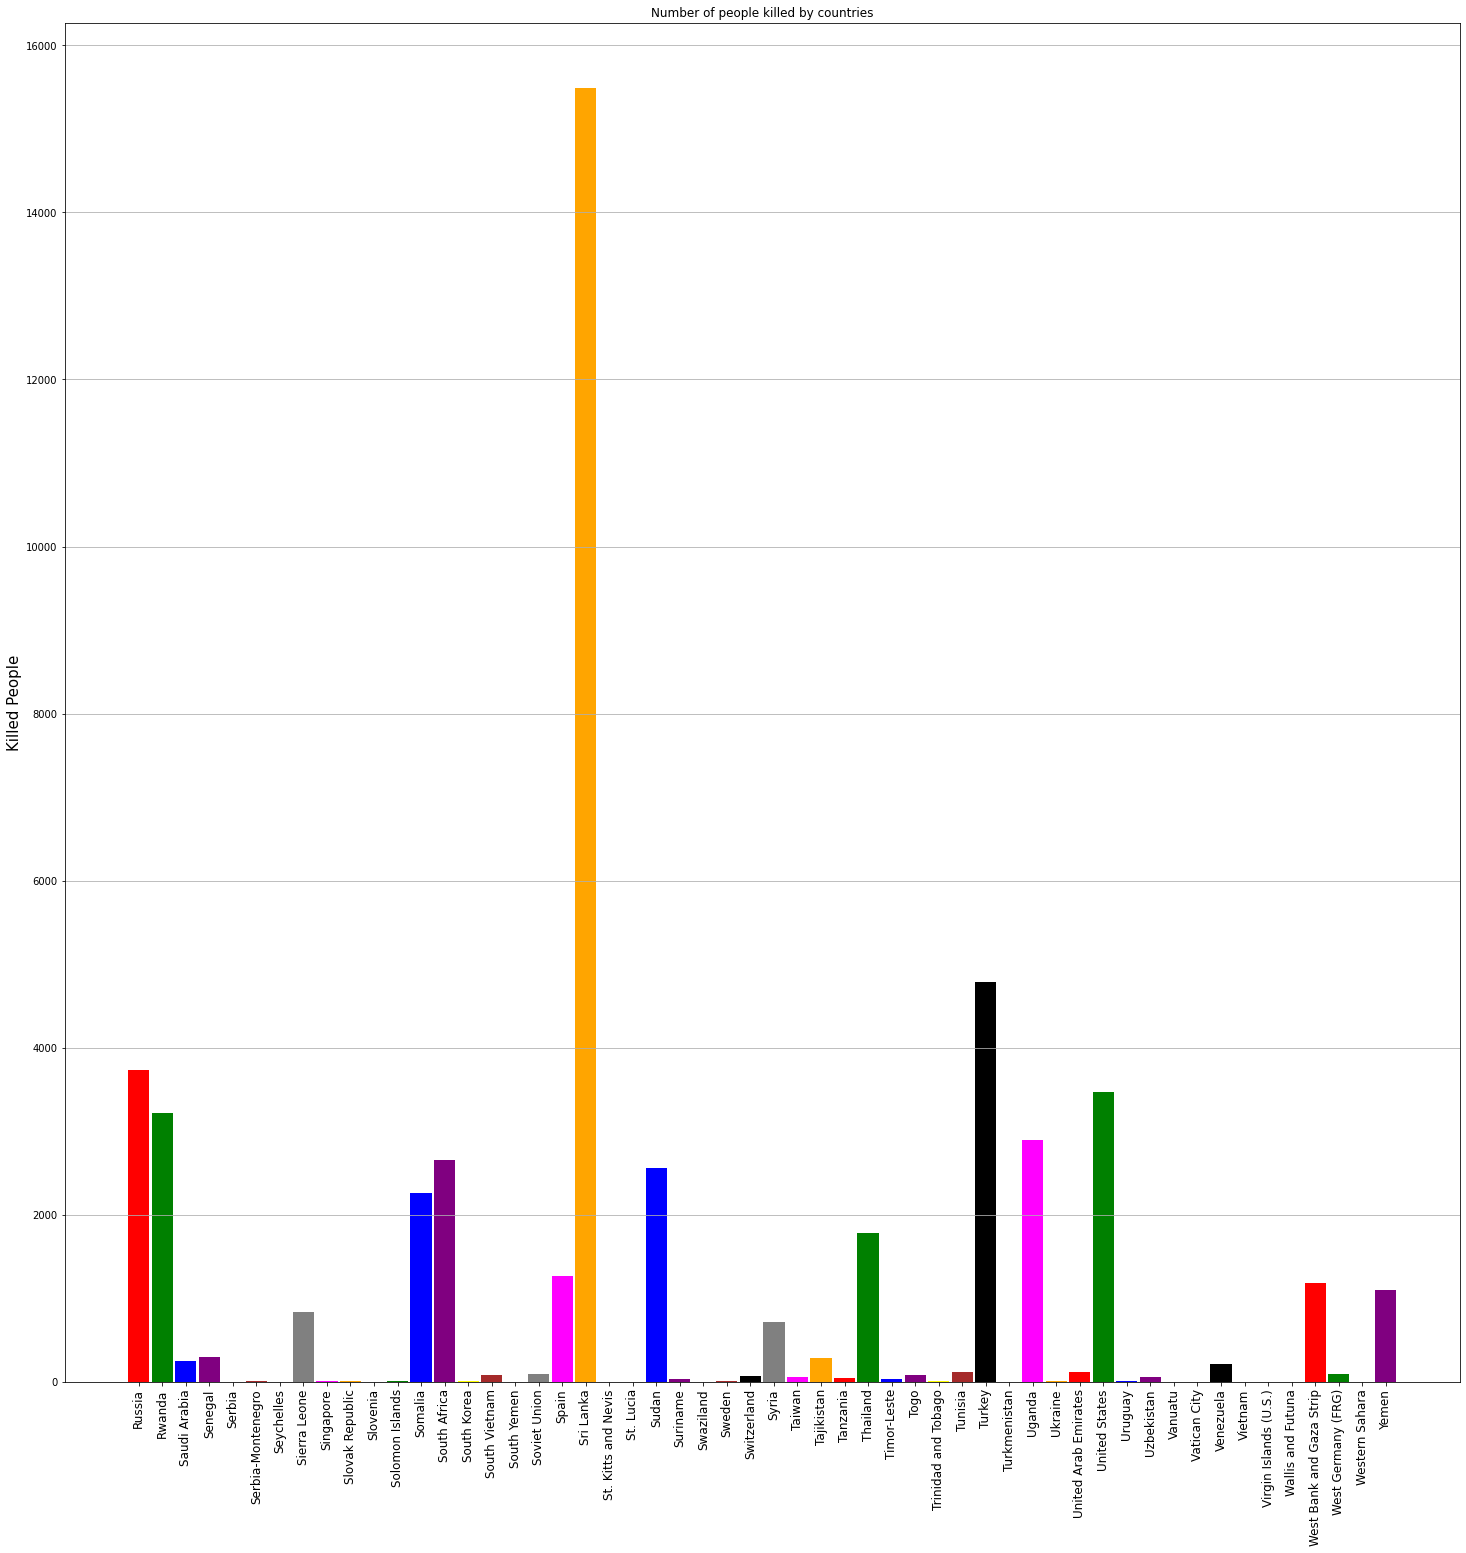

In [28]:

labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()